In [113]:
#load dataset
import pandas as pd
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
# for seeing first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# for checking rows and columns in the dataset
df.shape


(1338, 7)

In [7]:
#for checking number of null values
print(df.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [8]:
#data cleaning
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#check for unreasonable data
import numpy as np 
df.applymap(np.isreal)

,age,sex,bmi,children,smoker,region,charges
0,True,False,True,True,False,False,True
1,True,False,True,True,False,False,True
2,True,False,True,True,False,False,True
3,True,False,True,True,False,False,True
4,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...
1333,True,False,True,True,False,False,True
1334,True,False,True,True,False,False,True
1335,True,False,True,True,False,False,True
1336,True,False,True,True,False,False,True


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

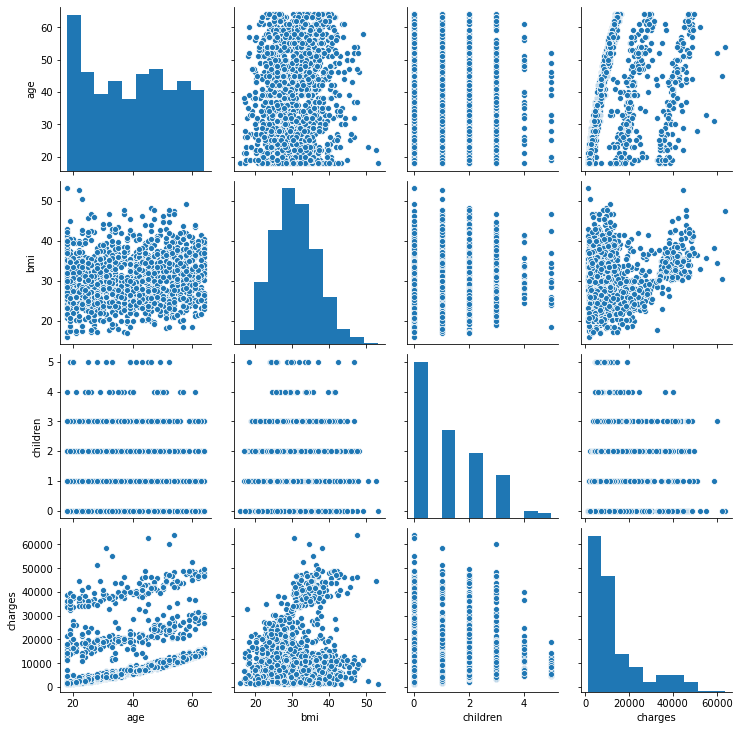

In [16]:
import seaborn as sns
graphs = sns.pairplot(df)
graphs.set()

In [21]:
cor = df.corr(method='pearson')
cor


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


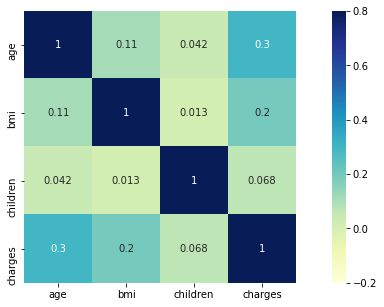

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
sns.heatmap(cor,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)
plt.show()


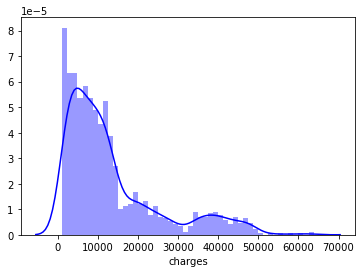

In [18]:
sns.distplot(df['charges'],bins=50, kde=True,color = 'blue')

In [22]:
#Encoding

import numpy as np
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(exclude=np.number)

In [23]:
encode_cat_df = pd.get_dummies(cat_df)

In [25]:
df1= [num_df,encode_cat_df]
df1=pd.concat(df1,axis=1)
df1.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [26]:
df1.shape

(1338, 12)

In [27]:
df1.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


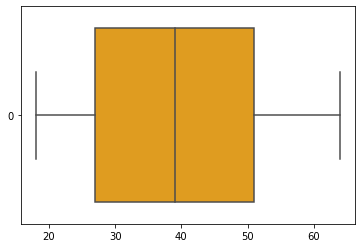

In [28]:
Boxdf1 = sns.boxplot(data = df1.age ,orient = 'h' ,color = 'orange')

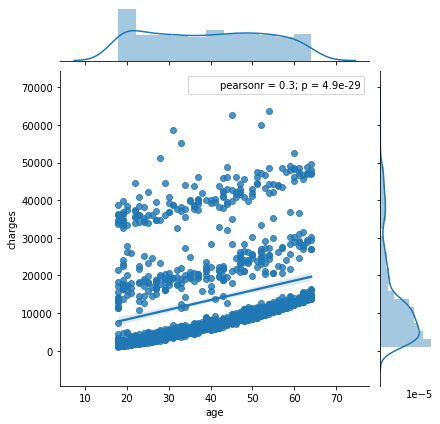

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from scipy import stats
Relation = sns.JointGrid(df['age'],df['charges'])
Relation = Relation .plot(sns.regplot, sns.distplot)
Relation  = Relation .annotate(stats.pearsonr)

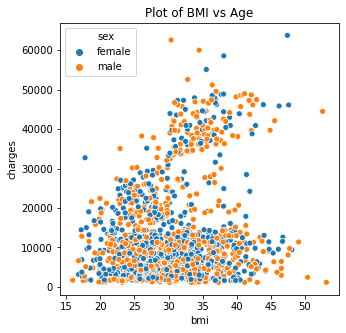

In [30]:

# plotting bmi vs charges to find correlation

plt.figure( figsize = (5,5))
plt.title('Plot of BMI vs Age')
sns.scatterplot(x ='bmi', y ='charges', data  = df, hue ='sex')


No handles with labels found to put in legend.


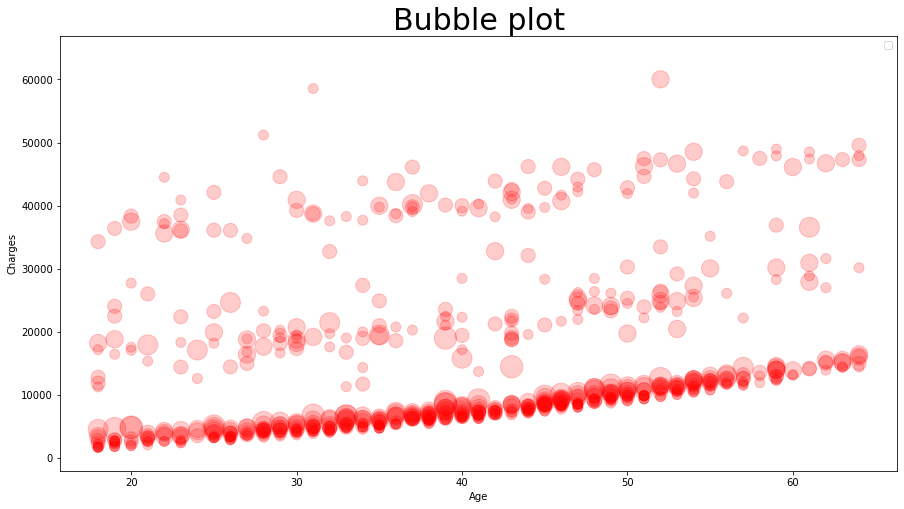

In [29]:
# bubble plot to show relation bet age, charges and children

plt.rcParams['figure.figsize'] = (15, 8)
plt.scatter(x = df1['age'], y = df1['charges'], s = df1['children']*100, alpha = 0.2, color = 'red')
plt.title('Bubble plot', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

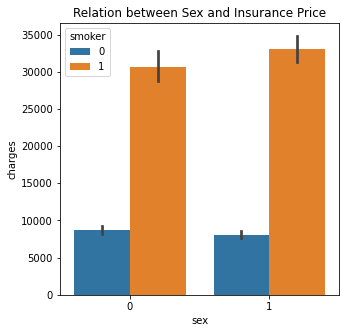

In [71]:
plt.figure(figsize = (5,5))
plt.title('Relation between Sex and Insurance Price')
sns.barplot( x ='sex', y = 'charges', data = df, hue = 'smoker')

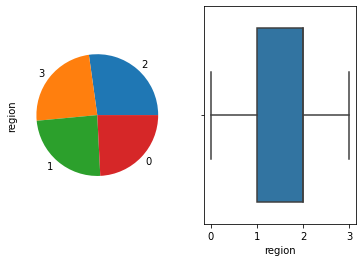

In [73]:
f,axes=plt.subplots(1,2)
df.region.value_counts().plot(kind="pie",ax=axes[0])
sns.boxplot(df['region'],ax=axes[1])

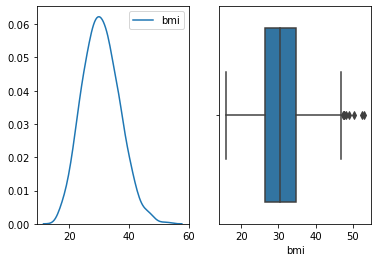

In [74]:
f,axes=plt.subplots(1,2)
sns.kdeplot(df['bmi'],ax=axes[0])
sns.boxplot(df['bmi'],ax=axes[1])

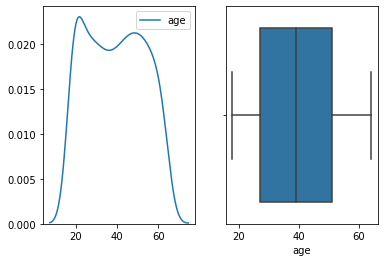

In [75]:
f,axes=plt.subplots(1,2)
sns.kdeplot(df['age'],ax=axes[0])
sns.boxplot(df['age'],ax=axes[1])

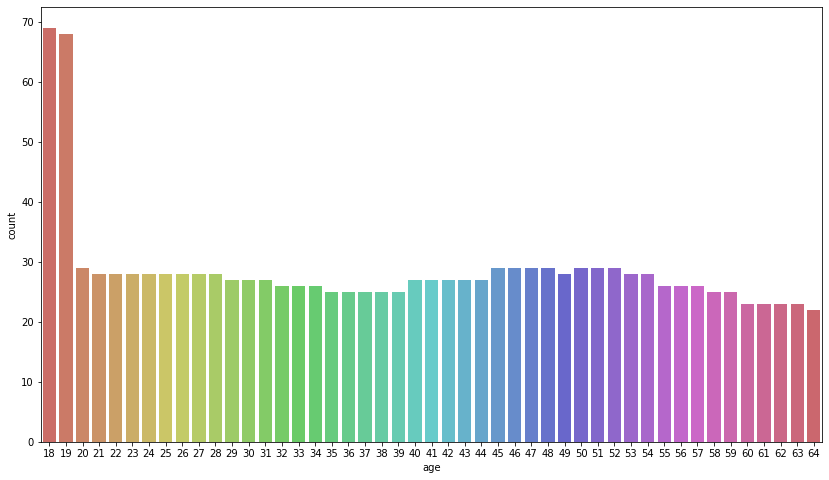

In [78]:
plt.figure(figsize = (14,8))
sns.countplot(x="age",data=df,palette="hls")

Text(0.5, 1.0, 'Number of children')

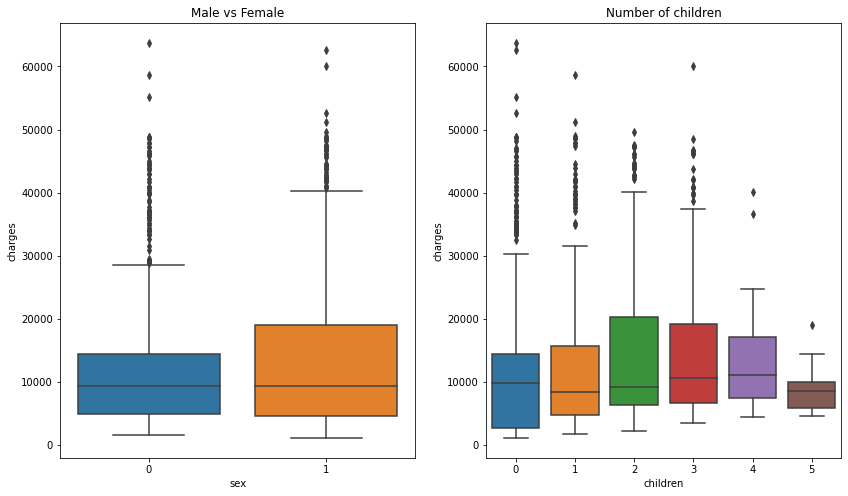

In [79]:
#male vs female and their charges, # of chilren and their charges
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.boxplot(x = 'sex',y='charges', data = df, ax=ax[0])
ax[0].set_title('Male vs Female')
sns.boxplot(x = 'children',y='charges', data = df, ax=ax[1])
ax[1].set_title('Number of children')

In [82]:
#set x and y
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df1.iloc[:,0:6]
y = df1['charges']

#stadardize data
X_scaled = StandardScaler().fit_transform(X)

#get feature names
X_columns = df1.columns[:6]

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)


In [83]:
df1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [87]:
#get correlation map
corr_mat=df1.corr()

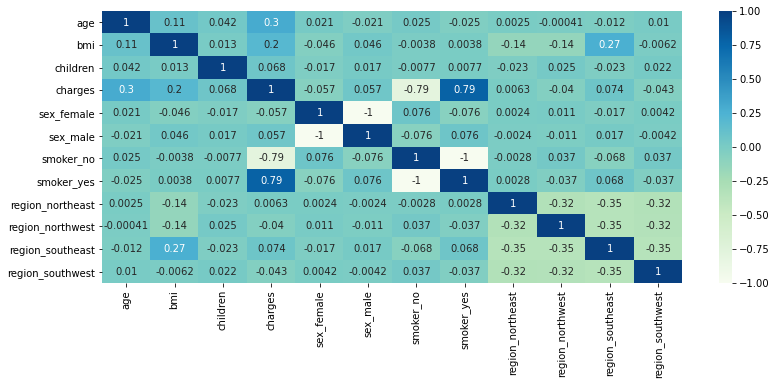

In [88]:
#visualise data
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

In [89]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import LinearRegression
import time
from datetime import date
#instantiate
linReg = LinearRegression()

start_time = time.time()
# fit out linear model to the train set data
linReg_model = linReg.fit(X_train, y_train)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0030641555786132812 seconds ---


In [98]:
df['age_per_bmi'] = df['age']/ df['bmi']
df.head()

,age,sex,bmi,children,smoker,region,charges,age_per_bmi
0,19,0,27.900,0,1,3,16884.92400,0.681004
1,18,1,33.770,1,0,2,1725.55230,0.533017
2,28,1,33.000,3,0,2,4449.46200,0.848485
3,33,1,22.705,0,0,1,21984.47061,1.453424
4,32,1,28.880,0,0,1,3866.85520,1.108033


In [100]:
#validate model
y_pred = linReg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)

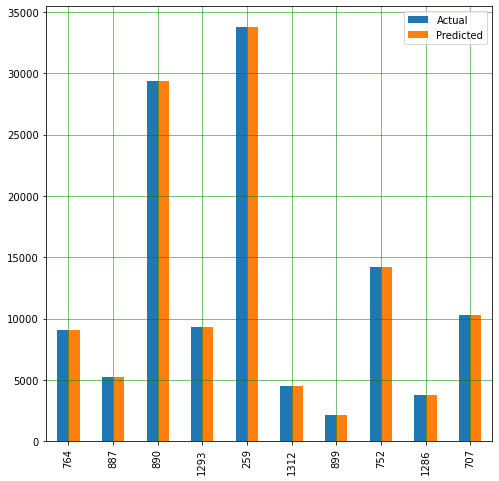

In [101]:
df1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [102]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.278203412862634e-12
Mean Squared Error: 1.2683394905882118e-22
Root Mean Squared Error: 1.1262057940661697e-11


In [103]:
# print the intercept and coefficients
print('Intercept: ',linReg.intercept_)
print('r2 score: ',linReg.score(X_train, y_train))

Intercept:  13270.422265141258
r2 score:  1.0


In [115]:

df.sex.unique()

array(['female', 'male'], dtype=object)

In [116]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [119]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
X = df
a = df['sex']
b = df['smoker']
c = df['region']

In [122]:
X['sex'] = le.fit_transform(X['sex'])

a = le.transform(a)

In [123]:
X['smoker'] = le.fit_transform(X['smoker'])

b = le.transform(b)


In [124]:
X['region'] = le.fit_transform(X['region'])

c = le.transform(c)


In [145]:
df = X

In [146]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [127]:
#linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [128]:
#get coefficient values
coeff_df = pd.DataFrame(linReg.coef_, X_columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,-9.383681e-12
bmi,-4.204392e-12
children,-1.055404e-12
charges,1.210548e+04
sex_female,-5.298012e-13
sex_male,5.298012e-13


In [136]:
# define input
import os

import statsmodels.api as sm
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

In [137]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,2.703116e-11,3.345024e-11
age,-3.495151e-13,-2.615517e-13
sex,-1.059183e-12,1.059183e-12
bmi,-3.735333e-13,-1.877954e-13
children,-2.126504e-13,6.673977e-13
smoker,-2.456647e-12,2.456647e-12
region,-6.549976e-13,3.139371e-13
charges,1.000000e+00,1.000000e+00


In [133]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.899e+32
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:33:23   Log-Likelihood:                 32018.
No. Observations:                1338   AIC:                        -6.402e+04
Df Residuals:                    1330   BIC:                        -6.398e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.024e-11   1.64e-12     18.484      0.0

In [139]:
df1 = df.drop('sex', axis = 1)

In [140]:
df1

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500
